In [1]:
import pandas as pd
df=pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

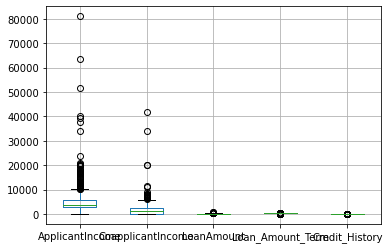

In [3]:
df.boxplot()

In [4]:
df=df[df["ApplicantIncome"]<10000]
df=df[df["CoapplicantIncome"]<1000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            250 non-null    object 
 1   Gender             247 non-null    object 
 2   Married            248 non-null    object 
 3   Dependents         243 non-null    object 
 4   Education          250 non-null    object 
 5   Self_Employed      238 non-null    object 
 6   ApplicantIncome    250 non-null    int64  
 7   CoapplicantIncome  250 non-null    float64
 8   LoanAmount         241 non-null    float64
 9   Loan_Amount_Term   245 non-null    float64
 10  Credit_History     231 non-null    float64
 11  Property_Area      250 non-null    object 
 12  Loan_Status        250 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 27.3+ KB


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 2 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            199 non-null    object 
 1   Gender             199 non-null    object 
 2   Married            199 non-null    object 
 3   Dependents         199 non-null    object 
 4   Education          199 non-null    object 
 5   Self_Employed      199 non-null    object 
 6   ApplicantIncome    199 non-null    int64  
 7   CoapplicantIncome  199 non-null    float64
 8   LoanAmount         199 non-null    float64
 9   Loan_Amount_Term   199 non-null    float64
 10  Credit_History     199 non-null    float64
 11  Property_Area      199 non-null    object 
 12  Loan_Status        199 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 21.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df["Married"].astype(str))
df["Married"]=le.transform(df["Married"].astype(str))
le.fit(df["Gender"].astype(str))
df["Gender"]=le.transform(df["Gender"].astype(str))
le.fit(df["Self_Employed"].astype(str))
df["Self_Employed"]=le.transform(df["Self_Employed"].astype(str))
le.fit(df["Loan_Status"].astype(str))
df["Loan_Status"]=le.transform(df["Loan_Status"].astype(str))
le.fit(df["Property_Area"].astype(str))
df["Property_Area"]=le.transform(df["Property_Area"].astype(str))
le.fit(df["Education"].astype(str))
df["Education"]=le.transform(df["Education"].astype(str))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1
15,LP001032,1,0,0,0,0,4950,0.0,125.0,360.0,1.0,2,1
17,LP001036,0,0,0,0,0,3510,0.0,76.0,360.0,0.0,2,0


In [8]:
x=df[["ApplicantIncome","Gender","CoapplicantIncome","Loan_Amount_Term","Credit_History","Married","Education","Self_Employed","LoanAmount","Property_Area"]].values
y=df["Loan_Status"].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
prediction=lr.predict(x_test)

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        20
           1       0.75      1.00      0.86        40

    accuracy                           0.78        60
   macro avg       0.88      0.68      0.69        60
weighted avg       0.84      0.78      0.75        60

